1. Convert data from label studio for training on TrOCR architecture

###### - Json-Min + COCO format -> TrOCR data preparation

1. replace image dir in json-min.json to correct image dir in your work environment

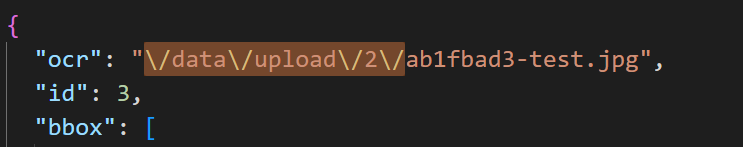

result ->

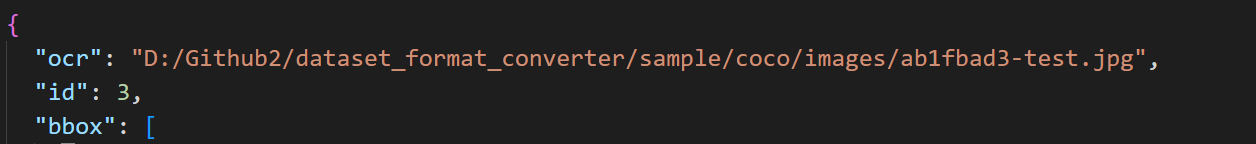

2. Change dir below to fit into your work environment

In [3]:
import os
import json
import random
from PIL import Image

# Paths
coco_img_folder = r"D:/Github2/dataset_format_converter/sample/coco/images"
json_min_path = r"D:/Github2/dataset_format_converter/sample/json-min.json"
output_folder = r"D:/Github2/dataset_format_converter/output"
train_image_folder = os.path.join(output_folder, "train")
test_image_folder = os.path.join(output_folder, "test")
train_label_file = os.path.join(output_folder, "train.txt")
test_label_file = os.path.join(output_folder, "test.txt")
train_percentage = 0.9

# Load JSON file
with open(json_min_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Ensure the output folders exist for train and test sets
os.makedirs(train_image_folder, exist_ok=True)
os.makedirs(test_image_folder, exist_ok=True)

# Shuffle the dataset for random splitting
random.shuffle(data)

# Split into 90% train and 10% test
split_index = int(train_percentage * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

# Function to crop and save images, and write labels
def process_data(data, image_folder, label_file):
    with open(label_file, "w", encoding="utf-8") as label_f:
        image_count = 1
        for entry in data:
            image_path = entry["ocr"]
            bboxes = entry["bbox"]
            transcriptions = entry["transcription"]

            # Load the image
            img = Image.open(image_path)
            original_width = bboxes[0]["original_width"]
            original_height = bboxes[0]["original_height"]

            # Crop each bounding box
            for i, bbox in enumerate(bboxes):
                x = bbox["x"] * original_width / 100
                y = bbox["y"] * original_height / 100
                width = bbox["width"] * original_width / 100
                height = bbox["height"] * original_height / 100

                # Define the cropped area
                crop_area = (x, y, x + width, y + height)

                # Crop the image
                cropped_img = img.crop(crop_area)

                # Save the cropped image in the appropriate folder (train/test)
                output_image_name = f"rd-lab_{image_count}.jpg"
                output_image_path = os.path.join(image_folder, output_image_name)
                cropped_img.save(output_image_path)

                # Write the corresponding transcription to the label file
                transcription_text = transcriptions[i] if i < len(transcriptions) else ""
                label_f.write(f"{output_image_name} {transcription_text}\n")

                image_count += 1

# Process training data
process_data(train_data, train_image_folder, train_label_file)

# Process test data
process_data(test_data, test_image_folder, test_label_file)

print(f"Processing complete. Train and test sets saved to {output_folder}.")


Processing complete. Train and test sets saved to D:/Github2/dataset_format_converter/output.
